<a href="https://colab.research.google.com/github/Maxoo005/ml-wakacyjne-wyzwanie-2025/blob/main/1_Maksymilian_Kula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/DANE LEKCJA 1/titanic.csv')

In [ ]:
type(titanic)

pandas.core.frame.DataFrame

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [ ]:
titanic.info()
print(titanic.isnull().sum())
display(titanic.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         793 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            98
Cabin          687
Embarked         2
dtype: int64


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


KOM
1.   Cabin 687 braków bardzo duzo usuwam
2.   Ticked usuwam
3.   Embarked uzupełnie wartością najczęściej występującą
4.   Fare uzupełnie medianą
5.   age uzupełnie medianą


In [ ]:
titanic_clean = titanic.copy()
titanic_clean.drop(columns=['Ticket','Cabin'],inplace=True)
titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0],inplace=True)
titanic_clean['Fare'].fillna(titanic_clean['Fare'].median(),inplace=True)
titanic_clean['Age'].fillna(titanic_clean['Age'].median(),inplace=True)

/tmp/ipython-input-2711603345.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0],inplace=True)
/tmp/ipython-input-2711603345.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
print(titanic_clean.isnull().sum())
titanic_clean.info()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
titanic_feat = titanic_clean.copy()
titanic_feat['Title'] = titanic_feat['Name'].str.extract(r',\s*([^\.]+)\.',expand=False)

grupuje tytuły z kolumny name do title

In [ ]:
title_counts = titanic_feat['Title'].value_counts()
rare_titles = title_counts[title_counts<10].index
titanic_feat['Title'] = titanic_feat['Title'].replace(rare_titles,'Rare')

FamilySize
1. "1"- pasazer podrozuje sam
2. ">1"- pasazer podrozuje z rodzina (dzieci, rodzice, rodzenstwo)
---
IsAlone(pomocniczo)
1.   0-ma rodzine
2.   1-samotny




In [ ]:
titanic_feat['FamilySize'] = titanic_feat['SibSp'] + titanic_feat['Parch'] + 1
titanic_feat['IsAlone'] = (titanic_feat['FamilySize'] == 1).astype(int)

nowe kolumny

In [ ]:
titanic_feat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1


płeć
*   male-0
*   female-1

In [ ]:
titanic_encoded = titanic_feat.copy()
titanic_encoded['Sex'] = titanic_encoded['Sex'].map({'male':0,'female':1})

dla Embarked i Title tworze kolumny binarne

In [ ]:
titanic_encoded = pd.get_dummies(titanic_encoded,columns=['Embarked', 'Title'],prefix=['Embarked', 'Title'],drop_first=True)

In [ ]:
titanic_encoded.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'FamilySize',
 'IsAlone',
 'Embarked_Q',
 'Embarked_S',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare']

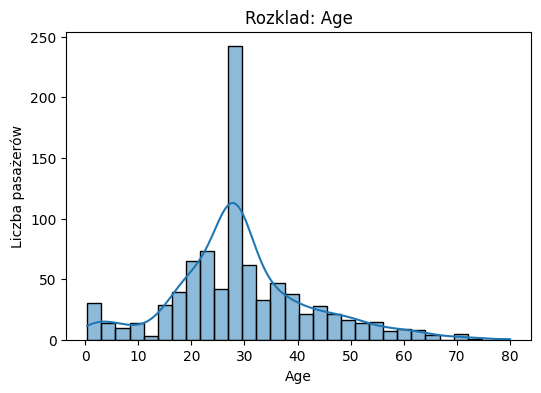

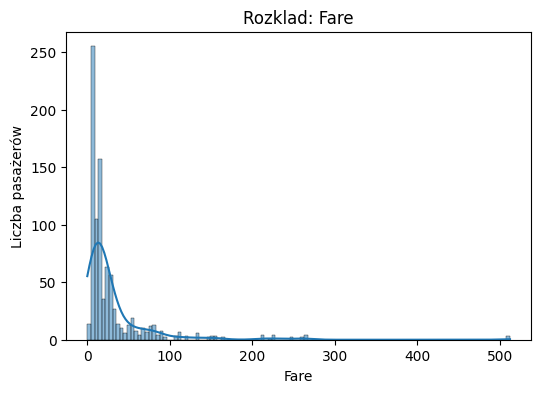

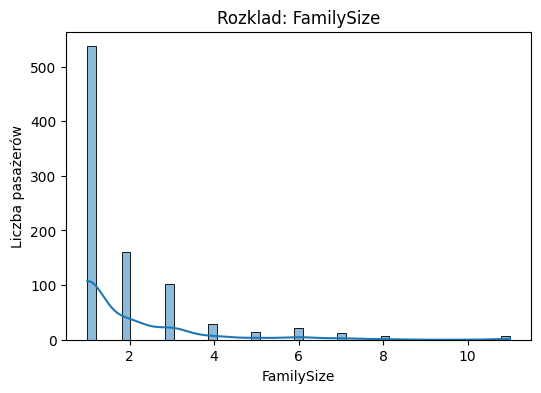

In [ ]:
from scipy import stats
numeric = ['Age','Fare','FamilySize']
for col in numeric:
  plt.figure(figsize=(6,4))
  sns.histplot(data=titanic_encoded[col],kde=True)
  plt.title(f'Rozklad: {col}')
  plt.xlabel(col)
  plt.ylabel('Liczba pasażerów')
  plt.show()


Badam skośność informującą o asymetrii rozkładu
---
Badam również kurtoze która mówi mi o kształcie szczytu
---
Dodatkowe informacje, nie potrzebne


In [ ]:
skewness = stats.skew(titanic_encoded[col].dropna())
kurtosis= stats.kurtosis(titanic_encoded[col].dropna())
print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')

Skewness: 2.72
Kurtosis: 9.10


skewness > 0 | kurtosis > 0
1.   więcej pasazerow w wieku 20-40
2.   mala grupa ludzi kupila bardzo drogie  bilety
3.   duzo ludzi samotnych, rzadkie duze rodziny

***Wykrywanie outlierów***

In [ ]:
def outliers(titanic, col):
  q1 = titanic[col].quantile(0.25)
  q2 = titanic[col].quantile(0.50)
  q3 = titanic[col].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  out = titanic[(titanic[col] < lower) | (titanic[col] > upper)]
  return out

In [ ]:
out_age = outliers(titanic_encoded, 'Age')
out_fare = outliers(titanic_encoded, 'Fare')
out_fs = outliers(titanic_encoded, 'FamilySize')
print(f'Liczba outlierów w kolumnie Age: {len(out_age)}')
print(f'Liczba outlierów w kolumnie Fare: {len(out_fare)}')
print(f'Liczba outlierów w kolumnie FamilySize: {len(out_fs)}')

Liczba outlierów w kolumnie Age: 66
Liczba outlierów w kolumnie Fare: 110
Liczba outlierów w kolumnie FamilySize: 91


**WIZUALIZACJA**

Klasa podrozy a przezycie

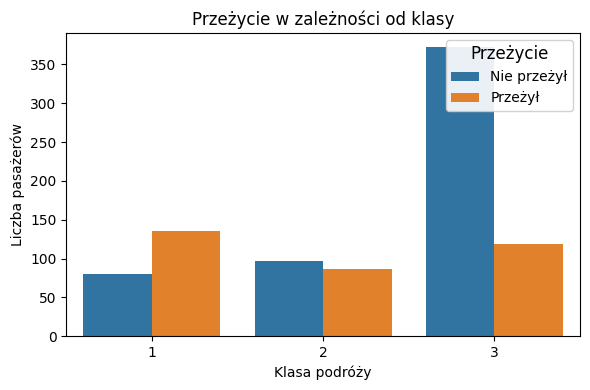

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_encoded)
plt.title('Przeżycie w zależności od klasy')
plt.xlabel('Klasa podróży')
plt.ylabel('Liczba pasażerów')
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['Nie przeżył','Przeżył'],
    title='Przeżycie',
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    facecolor='white'
)
plt.tight_layout()
plt.show()

Plec a przezycie

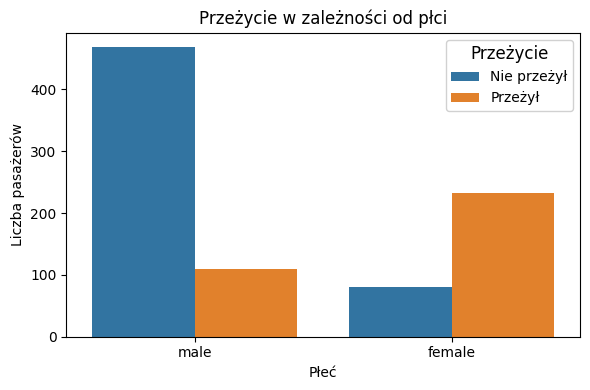

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_encoded)
plt.title('Przeżycie w zależności od płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')
plt.xticks([0,1], ['male','female'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['Nie przeżył','Przeżył'],
    title='Przeżycie',
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    facecolor='white'
)
plt.tight_layout()
plt.show()

Wiek a przezycie

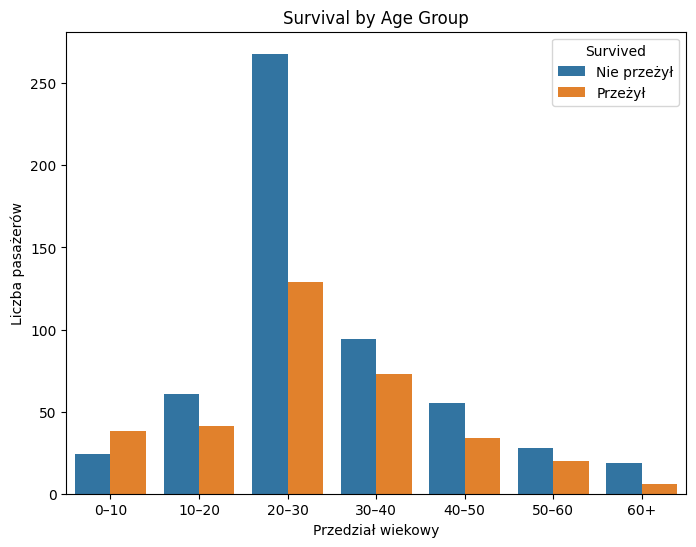

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 80]
labels = ['0–10','10–20','20–30','30–40','40–50','50–60','60+']
titanic_encoded['AgeGroup'] = pd.cut(titanic_encoded['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=titanic_encoded)
plt.title('Survival by Age Group')
plt.xlabel('Przedział wiekowy')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Survived', labels=['Nie przeżył','Przeżył'])
plt.show()

wielkosc rodziny a cena biletu z informacja czy pasazer przezyl

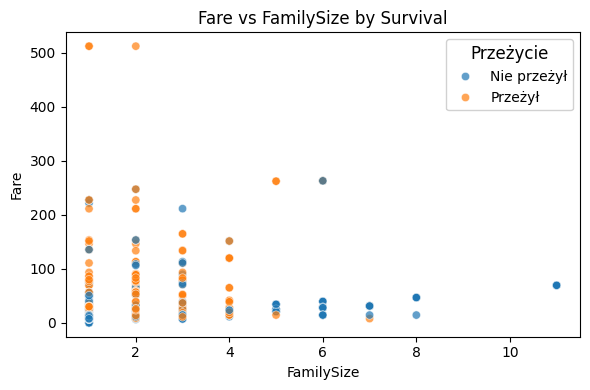

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(
    x='FamilySize',
    y='Fare',
    hue='Survived',
    data=titanic_encoded,
    palette={0: 'tab:blue', 1: 'tab:orange'},
    alpha=0.7
)
plt.title('Fare vs FamilySize by Survival')
plt.xlabel('FamilySize')
plt.ylabel('Fare')

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['Nie przeżył', 'Przeżył'],
    title='Przeżycie',
    title_fontsize=12,
    fontsize=10,
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    facecolor='white'
)

plt.tight_layout()
plt.show()

In [ ]:
summary = """
Usunięte kolumny: Ticket, Cabin
Uzupełniono braki: Age, Fare, Embarked
Nowe cechy: Title, FamilySize, IsAlone
Kodowanie: Sex→0/1, Embarked_Q/S, Title_Mr/Mrs/Miss/Rare
Kluczowe wnioski:
 - Kobiety i I klasa miały najwyższe wskaźniki przeżycia
 - Age: prawostronnie skośny (większość 20–40 lat)
 - Fare: wysoka asymetria i kurtoza (kilka bardzo drogich biletów)
 - FamilySize/IsAlone wpływają na przeżycie
"""
print(summary)


Usunięte kolumny: Ticket, Cabin, Name
Uzupełniono braki: Age, Fare, Embarked
Nowe cechy: Title, FamilySize, IsAlone
Kodowanie: Sex→0/1, Embarked_Q/S, Title_Mr/Mrs/Miss/Rare
Kluczowe wnioski:
 - Kobiety i I klasa miały najwyższe wskaźniki przeżycia
 - Age: prawostronnie skośny (większość 20–40 lat)
 - Fare: wysoka asymetria i kurtoza (kilka bardzo drogich biletów)
 - FamilySize/IsAlone wpływają na przeżycie



In [ ]:
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2,0,False,True,False,True,False,False,20–30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,0,False,False,False,False,True,False,30–40
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,1,False,True,True,False,False,False,20–30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,0,False,True,False,False,True,False,30–40
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,1,False,True,False,True,False,False,30–40
